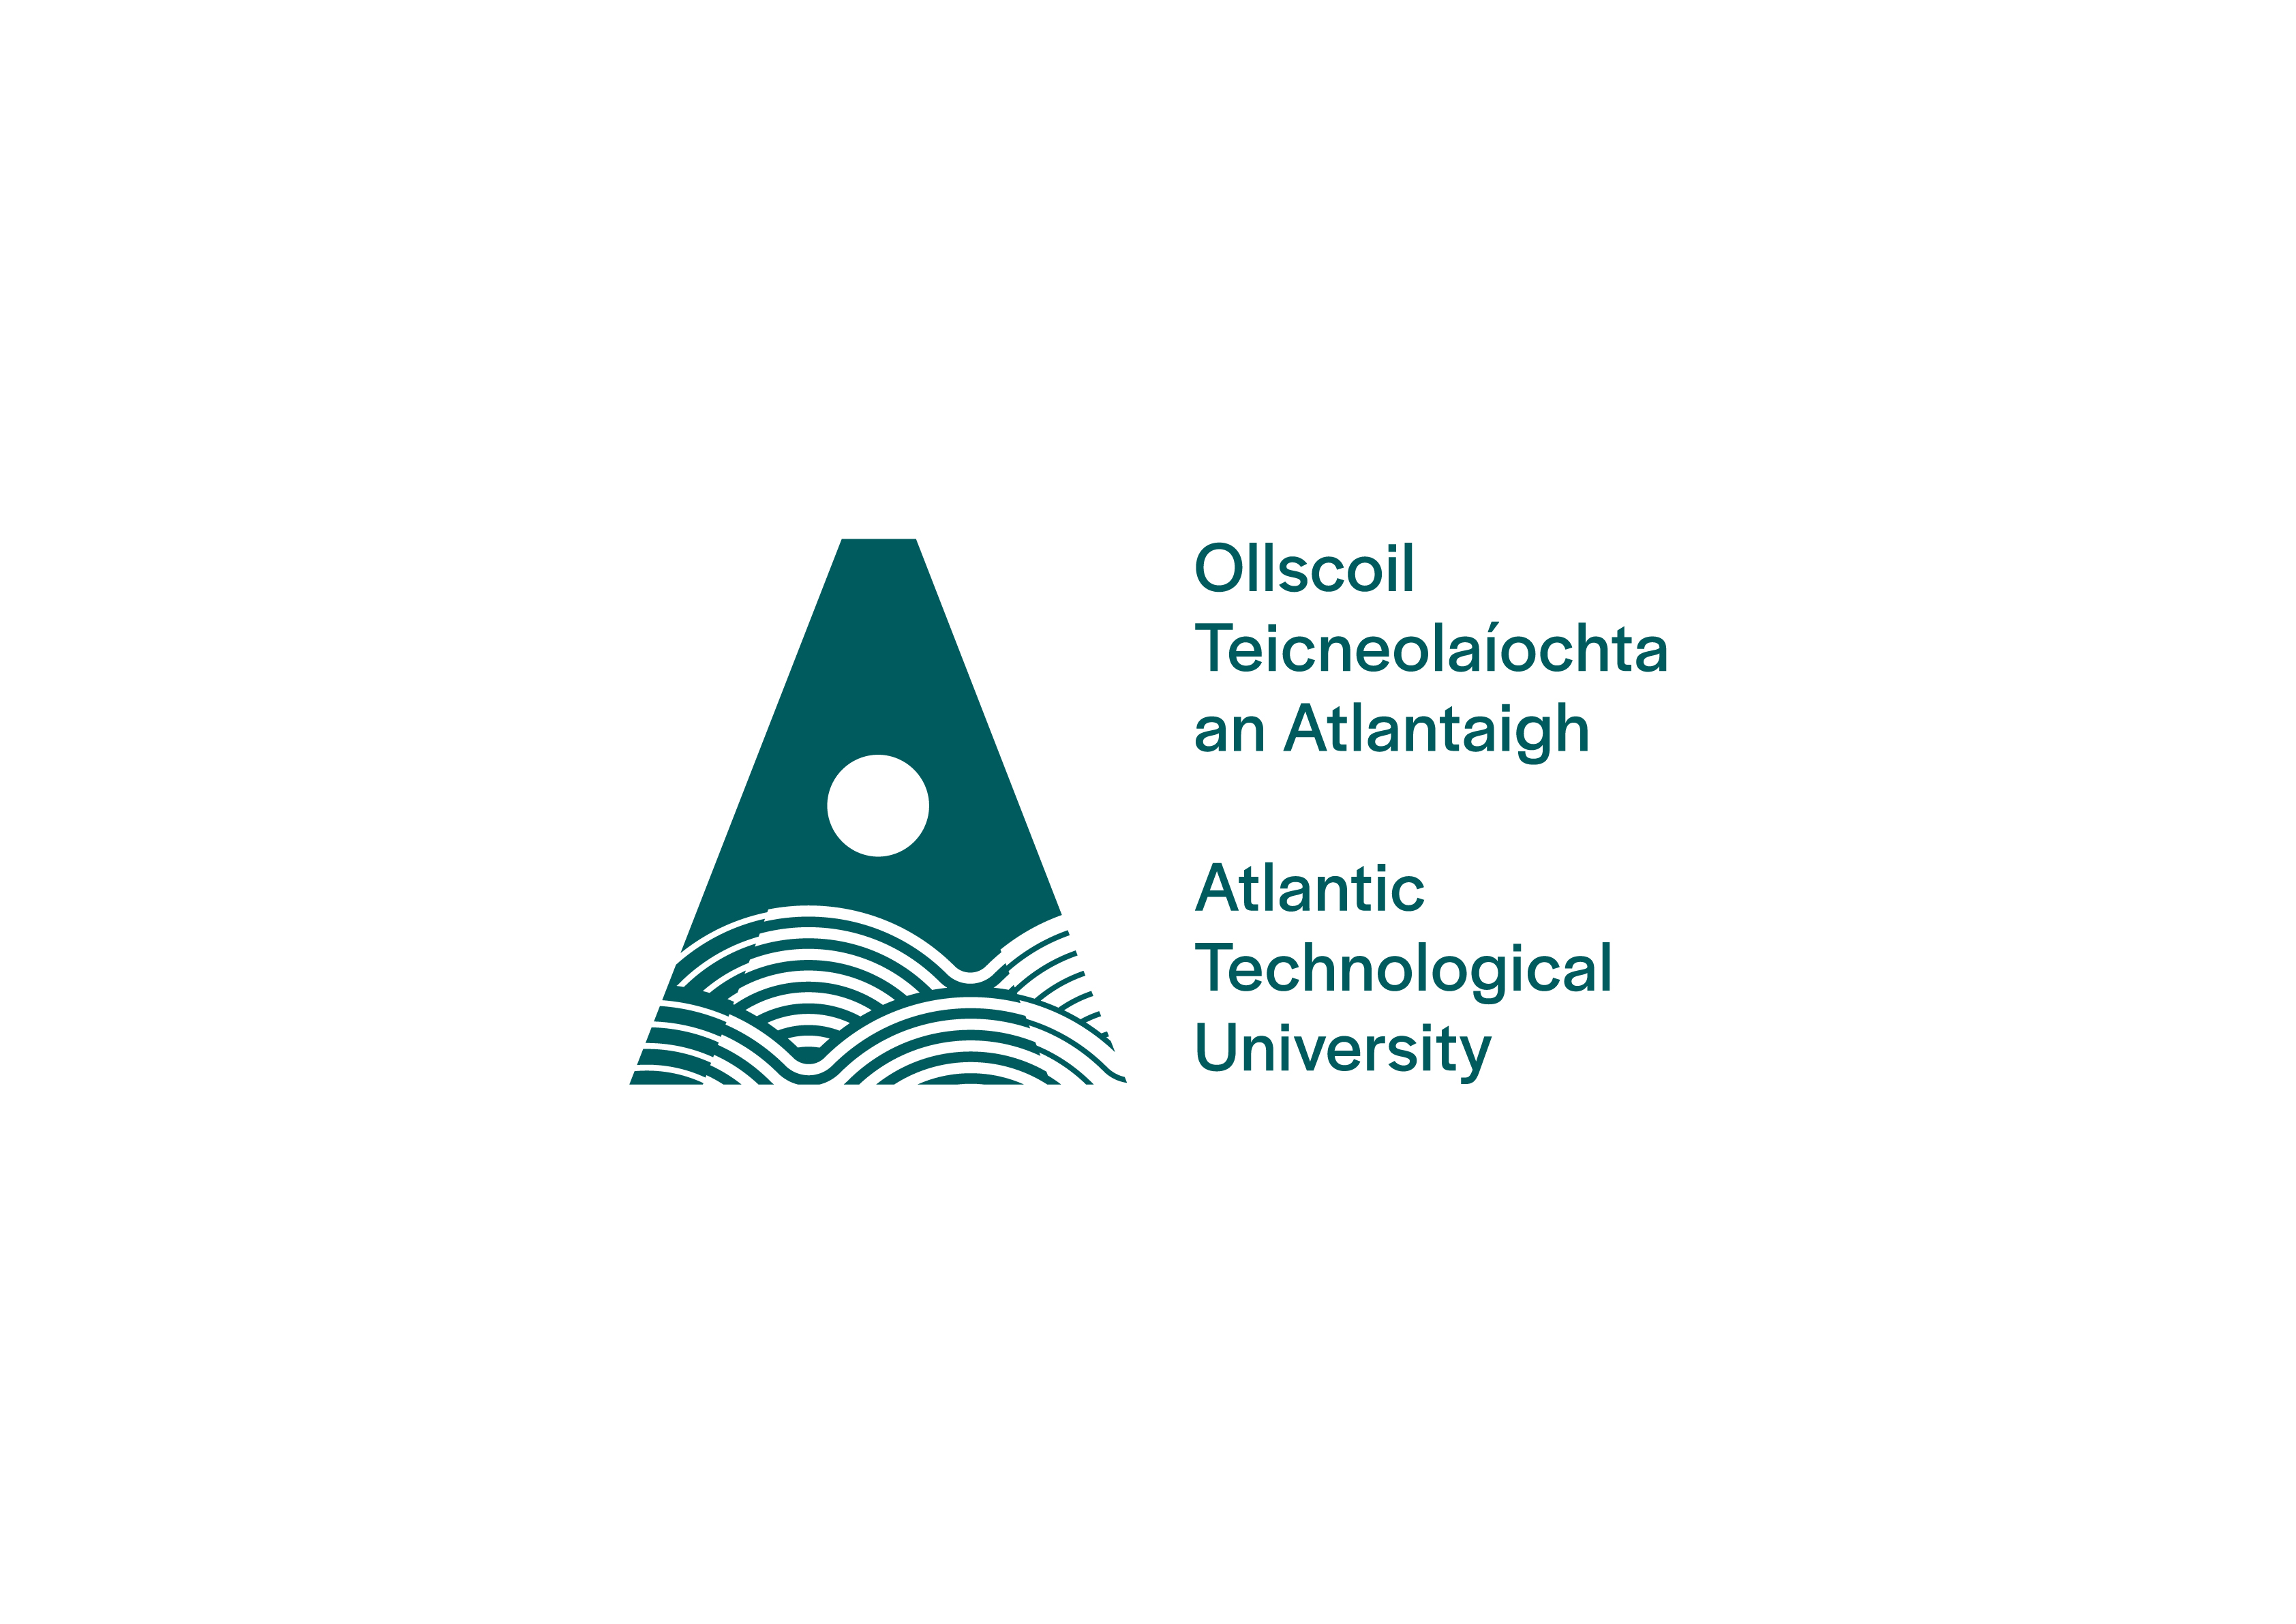

<h1 style="color: rgb(0, 133, 202);"> Normal Distribution</h1>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />



In [1]:
%matplotlib inline

In [25]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = 14, 10

<h3 style="color: rgb(0, 133, 202);"> Probability Density Function</h3>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

$$
y = \dfrac{1}{\sigma \sqrt{2\pi}}e^{-\dfrac{(x-\mu)^{2}}{2\sigma^{2}}}
$$

The probability density function of the normal distribution, when evaluated at $x$, gives the probability that a random variable $X$ in the distribution is $x$. 

The PDF of 0 is 0.3989422804014327
The PDF of 1 is 0.24197072451914337
The PDF of -1 is 0.24197072451914337


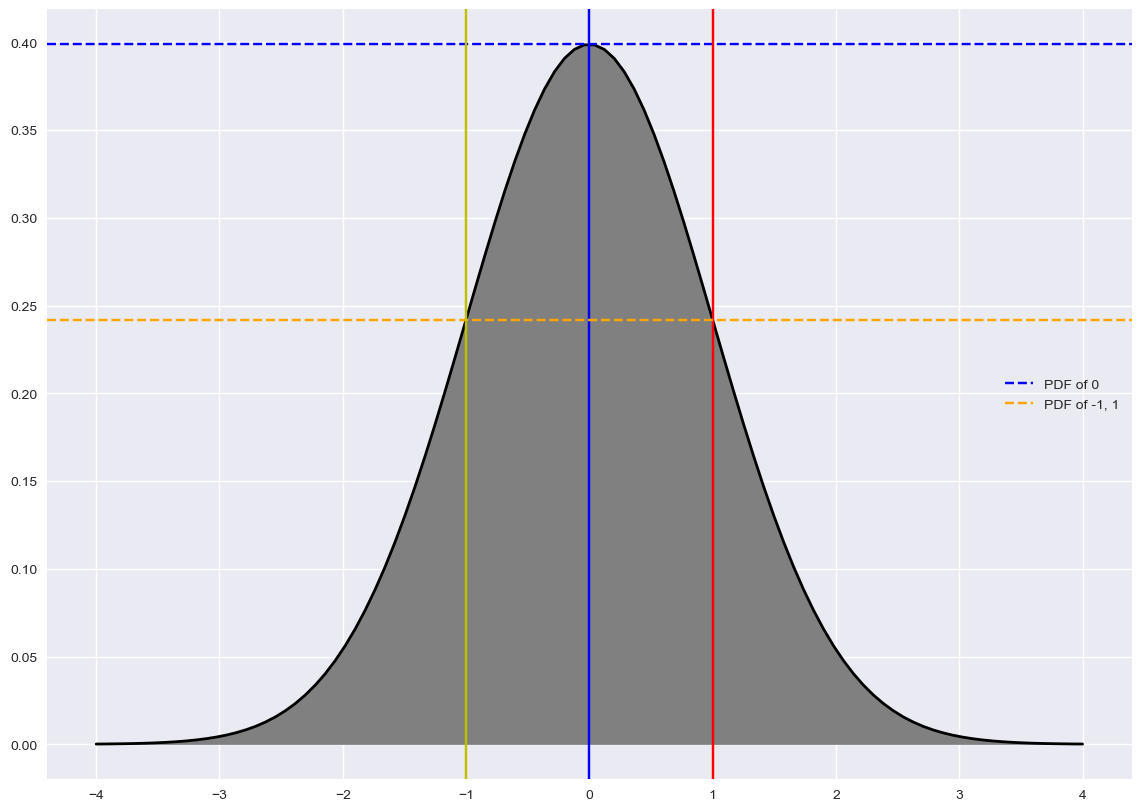

In [26]:
print("The PDF of 0 is {}".format(ss.norm().pdf(0)))
print("The PDF of 1 is {}".format(ss.norm().pdf(1)))
print("The PDF of -1 is {}".format(ss.norm().pdf(-1)))
xmin, xmax = -4, 4
x = np.linspace(xmin, xmax, 100)
p = ss.norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)
plt.axhline(ss.norm.pdf(0), color = 'b', linestyle = '--', label = "PDF of 0")
plt.axvline(0, color = 'b', linestyle = '-')
plt.axvline(1, color = 'r', linestyle = '-')
plt.axhline(ss.norm.pdf(-1), color = 'orange', linestyle = '--', label = "PDF of -1, 1")
plt.axvline(-1, color = 'y', linestyle = '-')
plt.fill_between(x, p, color = 'grey')
plt.legend()

<h3 style="color: rgb(0, 133, 202);"> Generating a normally distributed dataset</h3>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

(array([  2.,   2.,   3.,   9.,   9.,  13.,  22.,  36.,  44.,  53.,  63.,
         86., 130., 154., 202., 225., 316., 359., 378., 434., 480., 478.,
        513., 594., 597., 532., 554., 574., 489., 421., 380., 312., 325.,
        257., 199., 186., 149., 119., 105.,  56.,  43.,  32.,  25.,  15.,
         11.,   4.,   3.,   5.,   1.,   1.]),
 array([-3.49186768, -3.35075577, -3.20964387, -3.06853196, -2.92742006,
        -2.78630816, -2.64519625, -2.50408435, -2.36297244, -2.22186054,
        -2.08074864, -1.93963673, -1.79852483, -1.65741292, -1.51630102,
        -1.37518912, -1.23407721, -1.09296531, -0.9518534 , -0.8107415 ,
        -0.6696296 , -0.52851769, -0.38740579, -0.24629388, -0.10518198,
         0.03592992,  0.17704183,  0.31815373,  0.45926564,  0.60037754,
         0.74148944,  0.88260135,  1.02371325,  1.16482516,  1.30593706,
         1.44704896,  1.58816087,  1.72927277,  1.87038468,  2.01149658,
         2.15260849,  2.29372039,  2.43483229,  2.5759442 ,  2.7170561 ,
 

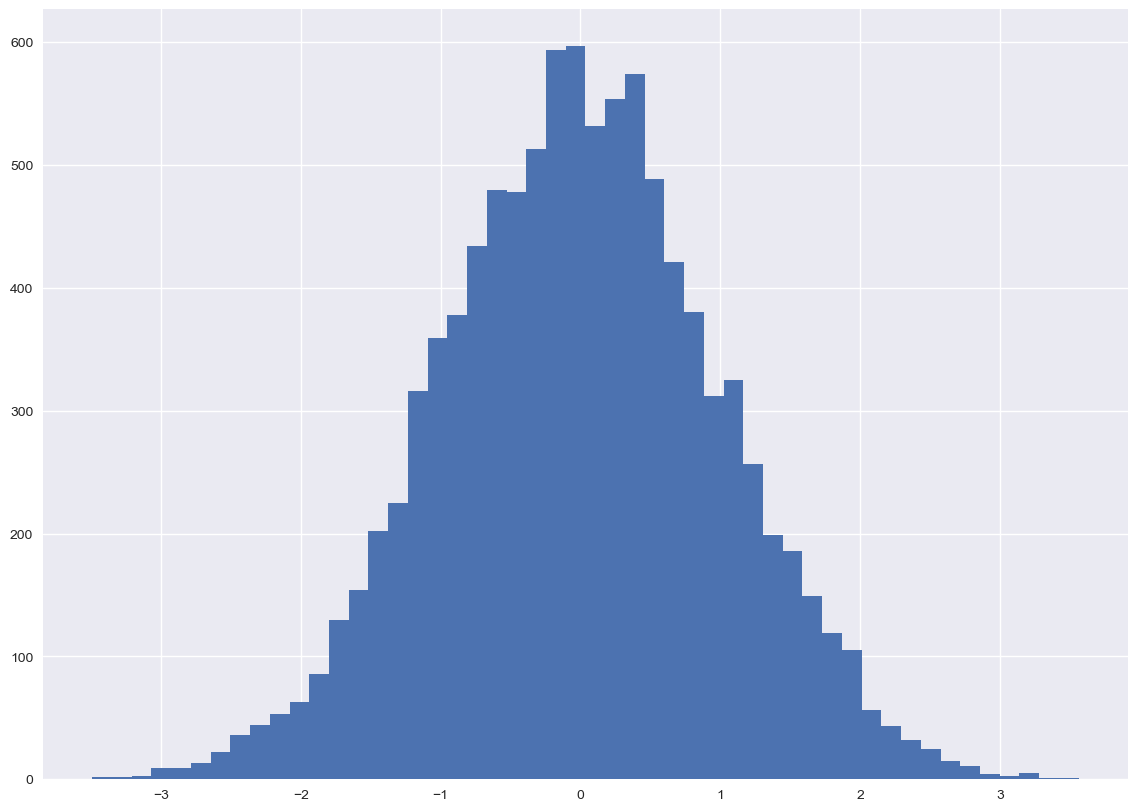

In [27]:
rng = np.random.default_rng()
values = rng.normal(0, 1, 10000)
plt.hist(values, bins=50)

Central Limit Theorem and sample means

The cumulative distribution function of the normal distribution, when evaluated at $x$ gives the probability that a normally distributed continuous, real-valued variable $X$ will take a value less than or equal to $x$. The formula for the CDF of a normal distribution is given by<br />
<br />
$$
\\
F(x) = \Phi\Big(\dfrac{x - \mu}{\sigma}\Big) = \dfrac{1}{2}\Bigg[1 + \mathrm{erf}\Bigg(\dfrac{x - \mu}{\sigma\sqrt{2}}\Bigg)\Bigg]
\\
$$
<br />
We can calculated the CDF using the cdf method from scipy.stats package. For our array values above the CDF of 1 is 0.8413. That is the probability of a random variable $X$ in this distribution being less than or equal to $1$ is 0.8413. We can see this in the plot below. The probability that $X$ is less than or equal to $1$ is the area of the orange section.

The CDF of 1 for the our normal distribution is 0.8413.


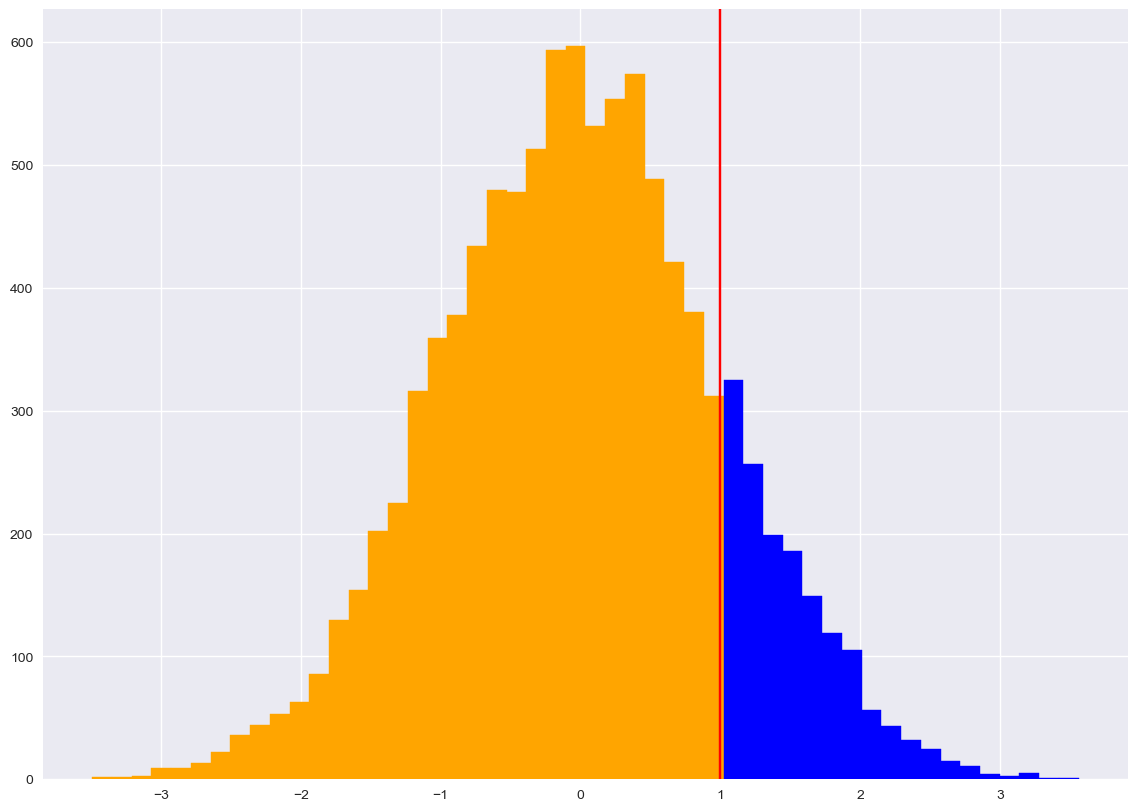

In [28]:
plt.hist(values, bins=50)
plt.axvline(1, color = 'r', linestyle = '-')
print("The CDF of 1 for the our normal distribution is {}.".format(round(ss.norm().cdf(1),4)))

for bar in plt.gca().containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # set bar color based on x
    if x <= 1:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

One standard deviation either side of the mean covers 68.27% of the values in the normal distribution.


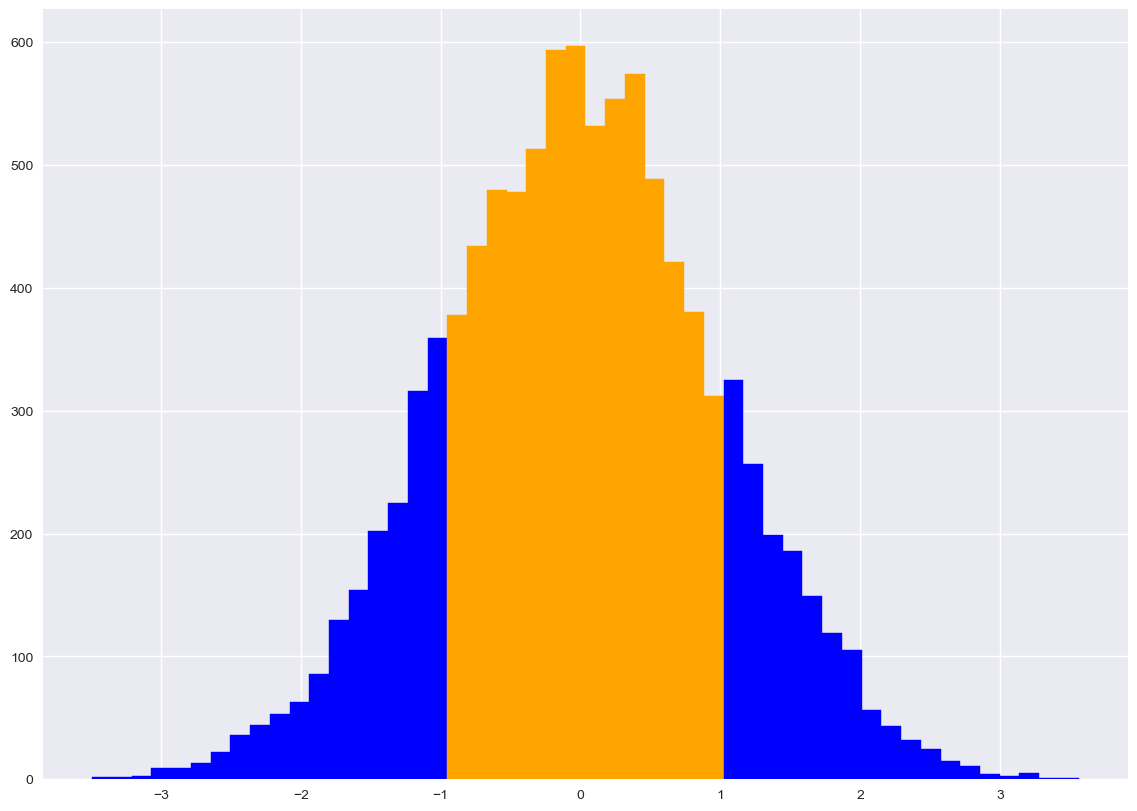

In [29]:
plt.hist(values, bins=50)
oneSigma = ss.norm().cdf(1) - ss.norm().cdf(-1)
print("One standard deviation either side of the mean covers {}% of the values in the normal distribution.".format(round(100*oneSigma,2)))

for bar in plt.gca().containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # set bar color based on x
    if x <= 1 and x >= -1:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

Two standard deviations either side of the mean cover 95.45% of the values in the normal distribution.


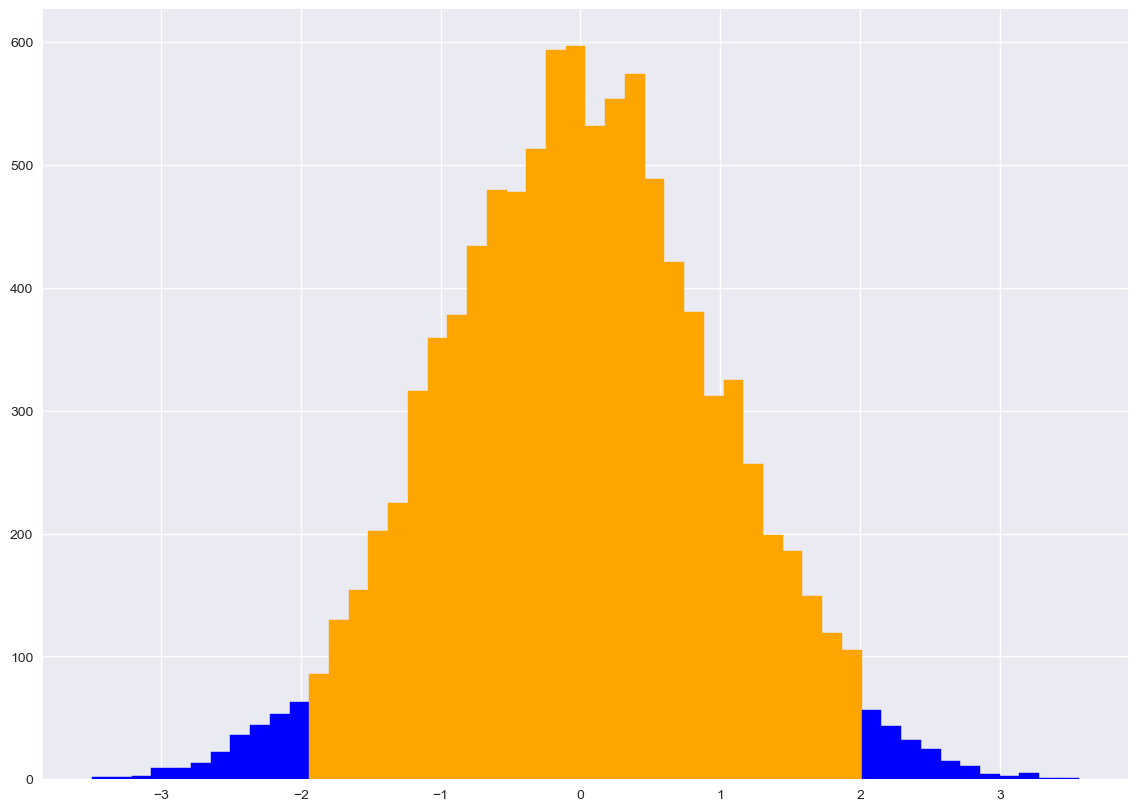

In [30]:
plt.hist(values, bins=50)
twoSigma = ss.norm().cdf(2) - ss.norm().cdf(-2)
print("Two standard deviations either side of the mean cover {}% of the values in the normal distribution.".format(round(100*twoSigma,2)))

for bar in plt.gca().containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # set bar color based on x
    if x <= 2 and x >= -2:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

Three standard deviations either side of the mean cover 99.73% of the values in the normal distribution.


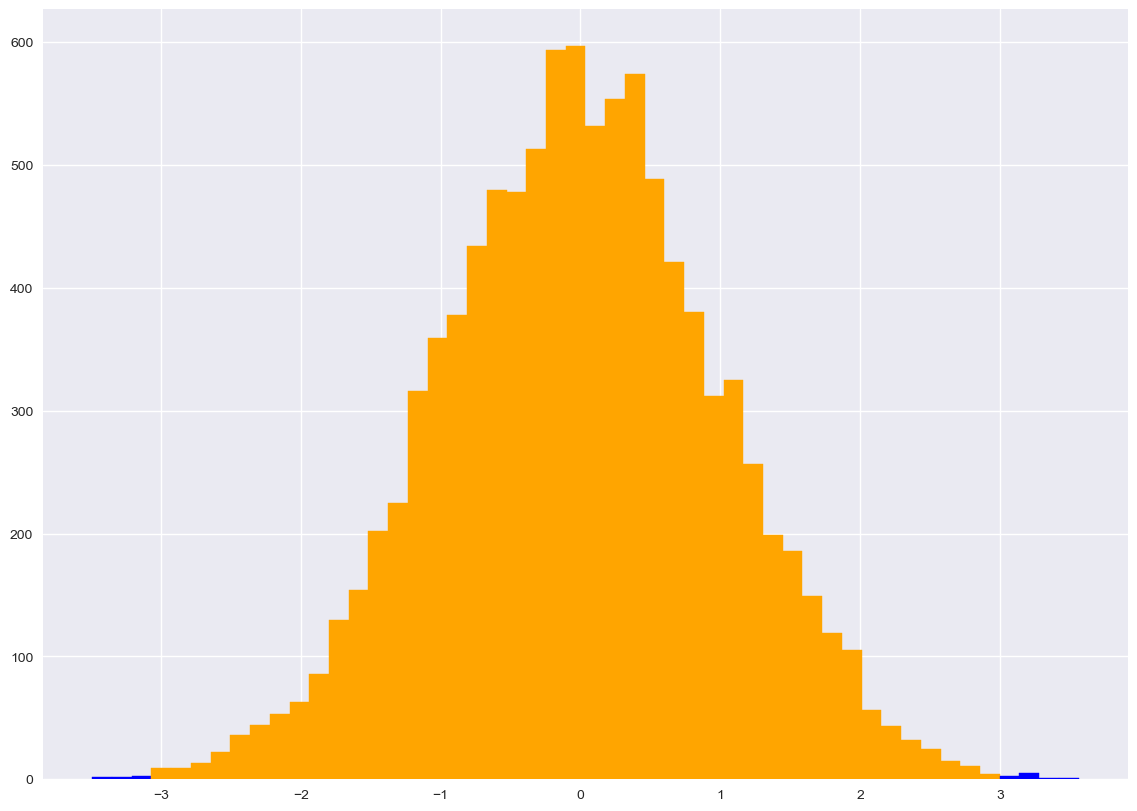

In [31]:
plt.hist(values, bins=50)
threeSigma = ss.norm().cdf(3) - ss.norm().cdf(-3)
print("Three standard deviations either side of the mean cover {}% of the values in the normal distribution.".format(round(100*threeSigma,2)))

for bar in plt.gca().containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # set bar color based on x
    if x <= 3 and x >= -3:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

<h3 style="color: rgb(0, 133, 202);">Industry applications of the normal distribution</h3>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

A major application of the normal distribution in industry is the control of manufacturing processes. Many processes, such as the high volume manufacture of nuts and bolts, present as normally distributed values. 

In [32]:
ss.norm().cdf(3) - ss.norm().cdf(-3)

0.9973002039367398

Six Sigma and Statistical Process Control - special cause/common cause

Capability

<h2 style="color: rgb(0, 133, 202);">References</h2>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

https://en.wikipedia.org/wiki/Normal_distribution <br />
https://www.six-sigma-material.com/Normal-Distribution.html <br />
https://mathworld.wolfram.com/CentralLimitTheorem.html